In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

#### Data Importing and Cleaning

In [2]:
df = pd.read_csv('C:/Users/mamta/Desktop/DESKTOP MAMTA/Bsc Projects/cyclistic case study/trip_data.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,weekday
0,8709650,8709859,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57,3
1,8709651,8709860,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21,0
2,8709652,8709861,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21,1
3,8709653,8709862,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56,1
4,8709654,8709863,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02,3


In [3]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8058176 entries, 0 to 8058175
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  ride_length         object 
 14  weekday             int64  
dtypes: float64(4), int64(1), object(10)
memory usage: 922.2+ MB


In [5]:
df.isnull().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1190481
start_station_id      1190613
end_station_name      1273705
end_station_id        1273846
start_lat                   0
start_lng                   0
end_lat                  8318
end_lng                  8318
member_casual               0
ride_length                 0
weekday                     0
dtype: int64

In [6]:
df['started_at']=pd.to_datetime(df['started_at'])
df['ended_at']=pd.to_datetime(df['ended_at'])

In [7]:
df.drop(df[(df['started_at']>df['ended_at'])].index,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8058054 entries, 0 to 8058175
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_length         object        
 14  weekday             int64         
dtypes: datetime64[ns](2), float64(4), int64(1), object(8)
memory usage: 983.6+ MB


In [9]:
df['ride_length'] = pd.to_timedelta(df['ride_length'])

# Define a custom function to convert seconds to hh:mm:ss format
def seconds_to_hms(seconds):
    m, s = divmod(int(seconds), 60)
    h, m = divmod(m, 60)
    return f'{h:02d}:{m:02d}:{s:02d}'

# Apply the custom function to the Time column
df['ride_length'] = df['ride_length'].dt.total_seconds().apply(seconds_to_hms)

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,weekday
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,00:02:57,3
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,00:04:21,0
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,00:04:21,1
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,00:14:56,1
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,00:06:02,3


#### Data Analysis and Visualizations
##### Scenario: 
Cyclistic is a bike-share company in Chicago with a fleet of 5,824 bicycles and 692 stations. They offer single-ride passes, full-day passes, and annual memberships, with annual members being more profitable than casual riders. The company aims to design marketing strategies to convert casual riders into annual members by analyzing historical bike trip data to identify trends and better understand the differences between the two groups. The goal is to maximize the number of annual members for future growth.
###### Problem Statement: How do annual members and casual riders use Cyclistic bikes differently?

To answer this question, we need answer we need to look into some other details related to both category of memberships.
<br>From these insights, we will design a new marketing strategy to convert casual riders into annual members backed up with compelling data insights and professional data visualizations.
<br><br>Let's start with the first question: 
1. What is the distribution of ride lengths for members vs casual riders? Are there any significant differences between the two groups?

In [10]:
#annotations
def annotations(plots):
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=8, xytext=(0, 8),
                       textcoords='offset points')

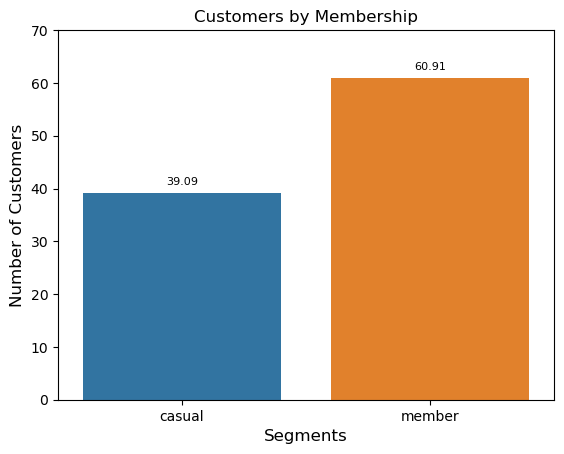

In [11]:
#Number of customers by membership type
seg = df[['ride_id','member_casual']]
seg.columns = ['Customers','Membership']
seg_total = seg.groupby(seg['Membership']).count()
seg_percentage=seg_total/seg_total.sum() *100
plots=sns.barplot(data=seg_percentage.reset_index(),x='Membership',y = 'Customers')
annotations(plots)
plt.xlabel("Segments", size=12)
plt.ylabel("Number of Customers", size=12)
plt.title("Customers by Membership")
plt.ylim(0,70)
plt.xticks(rotation='horizontal')
plt.show()

In [12]:
#let's create a table which shows the ride length in hours and number of customers accordingly . 
#for e.g. >1 hr : x customers , >2 hr : y customers ........and so on till by membership.
#another table for average ride length of casual riders vs annual members

In [13]:
ride_lengths = df[['member_casual','ride_length']]
ride_lengths['ride_length']= pd.to_timedelta(ride_lengths['ride_length']).dt.total_seconds().astype(int)

In [14]:
table = {}
for i in range(1,25):
    table[f"<{i}"] =[np.count_nonzero(((ride_lengths[ride_lengths['member_casual']=='member']['ride_length']/3600)<i) &
                                      ((ride_lengths[ride_lengths['member_casual']=='member']['ride_length']/3600)>i-1)),
                     np.count_nonzero(((ride_lengths[ride_lengths['member_casual']=='casual']['ride_length']/3600)<i)&
                                      ((ride_lengths[ride_lengths['member_casual']=='casual']['ride_length']/3600)>i-1))]
table = pd.DataFrame(table).T.reset_index()
table.columns = ['hours','member','casual']

In [15]:
table1 = {}
for i in np.arange(48,689,24):
    table1[f"<{i}"] =[np.count_nonzero(((ride_lengths[ride_lengths['member_casual']=='member']['ride_length']/3600)<i) &
                                      ((ride_lengths[ride_lengths['member_casual']=='member']['ride_length']/3600)>i-24)),
                     np.count_nonzero(((ride_lengths[ride_lengths['member_casual']=='casual']['ride_length']/3600)<i)&
                                      ((ride_lengths[ride_lengths['member_casual']=='casual']['ride_length']/3600)>i-24))]
table1 = pd.DataFrame(table1).T.reset_index()
table1.columns = ['hours','member','casual']

In [16]:
table = table.append(table1, ignore_index = True)

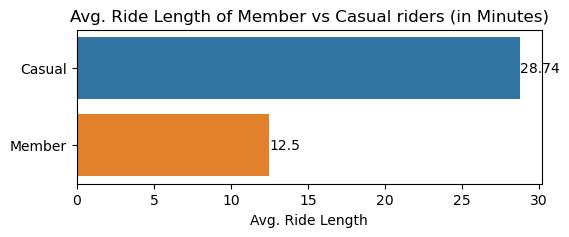

In [17]:
avg = np.array([np.round(np.mean(ride_lengths[ride_lengths['member_casual']=='casual']['ride_length'])/60,2),
       np.round(np.mean(ride_lengths[ride_lengths['member_casual']=='member']['ride_length'])/60,2)])
plt.figure(figsize=(6,2))
ax = sns.barplot(y=['Casual','Member'],x=avg)
ax.bar_label(ax.containers[0])
plt.title("Avg. Ride Length of Member vs Casual riders (in Minutes)")
plt.xlabel('Avg. Ride Length')
plt.show()

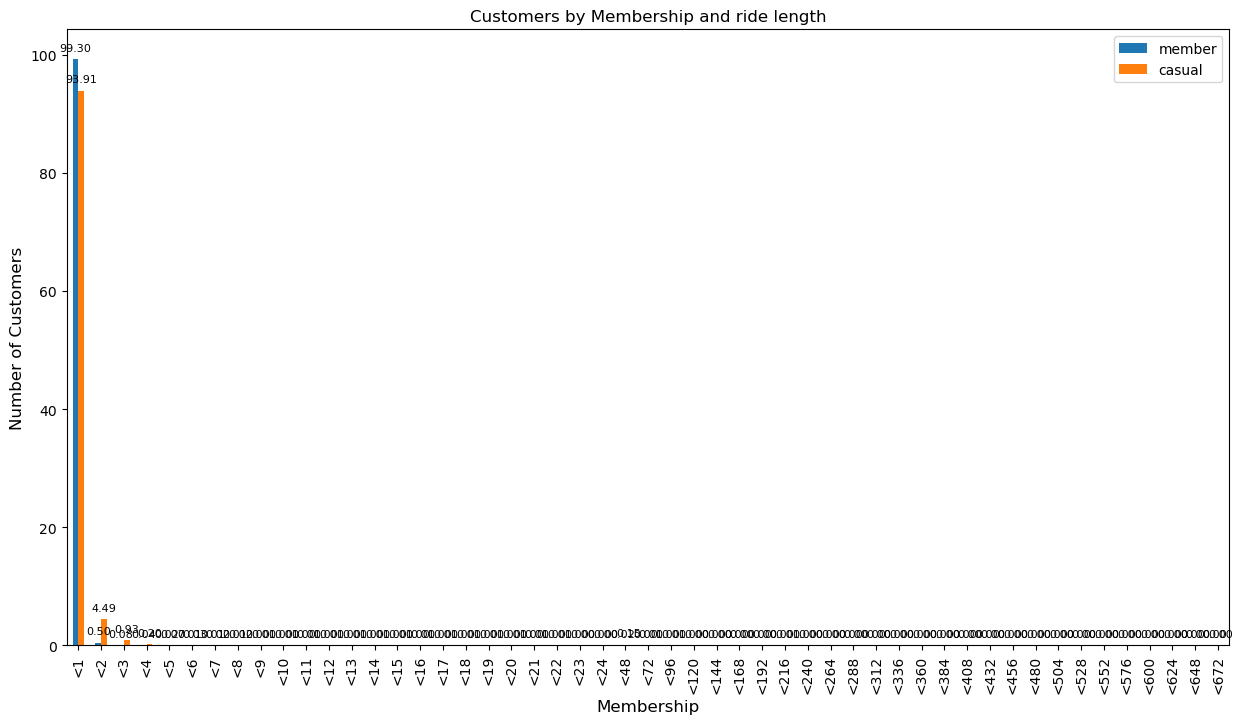

In [18]:
#plot the table
cust_percentage= pd.DataFrame([(table['member']/sum(table['member']))*100,
                              (table['casual']/sum(table['casual']))*100,table['hours']]).T
plots=cust_percentage.plot(x='hours',y = ['member','casual'],kind='bar',figsize=(15,8))

annotations(plots)

plt.xlabel("Membership", size=12)
plt.ylabel("Number of Customers", size=12)
plt.title("Customers by Membership and ride length")
# plt.ylim(0,25)
plt.xticks(rotation='vertical')
plt.show()

60.91% customers are annual members and the rest 39.09% are casual riders. Moreover, from the above visualization, it is clear that almost all the members (99.30%) have rode for <1 hour and most of the casual riders (93.91%) rode for <1 hour. the rest ride durations are almost negligible.<br><br>
Therefore Let's dig into <=1 hour ride length category for members vs casual riders

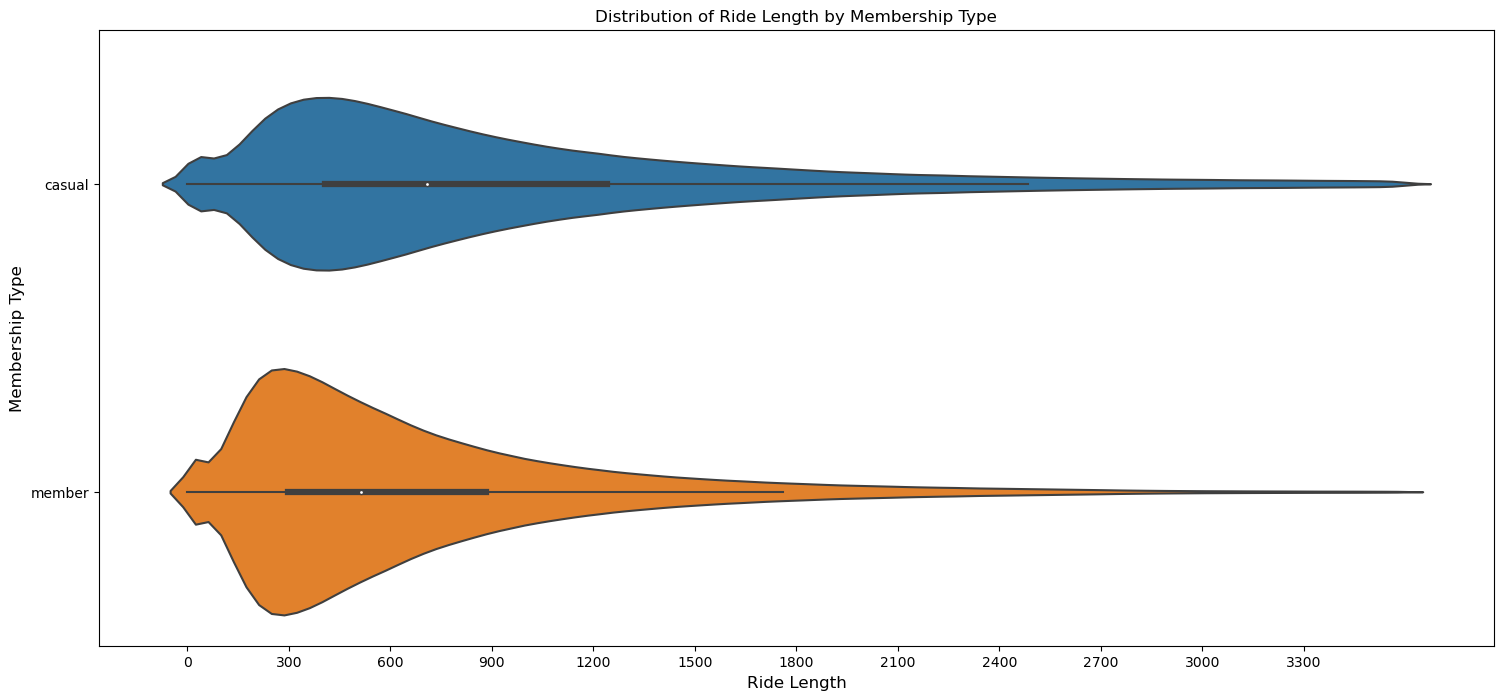

In [19]:
plt.figure(figsize=(18,8))
sns.violinplot(data = ride_lengths[ride_lengths['ride_length']<=3600], x= 'ride_length',y = 'member_casual')
plt.xlabel('Ride Length',size=12)
plt.ylabel('Membership Type',size=12)
plt.title('Distribution of Ride Length by Membership Type')
plt.xticks(np.arange(0,3600,300))
plt.show()

Most of the customers prefer short duration rides i.e. of 2-20 minutes and the median ride length is 5 minutes approx.
- There is no significant difference between the two types of riders, they have almost similar usage pattern in terms of duration.
<br>
<br> 
Let's move ahead with the next question which is also related to usage pattern:
2. what is the distribution of weekday for members vs casual riders.

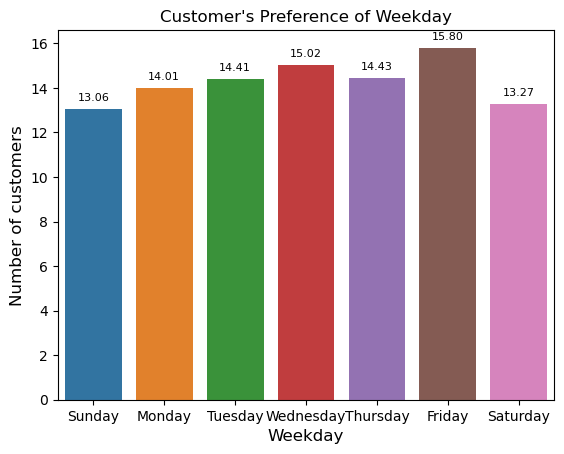

In [20]:
table = df[['ride_id','weekday']].groupby(['weekday']).count().reset_index()
table['ride_id'] = (table['ride_id']/df.shape[0])*100
table['weekday'] = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plots = sns.barplot(data= table,x='weekday',y='ride_id')
annotations(plots)
plt.title("Customer's Preference of Weekday",size=12)
plt.xlabel('Weekday',size=12)
plt.ylabel('Number of customers',size=12)
plt.xticks(rotation='horizontal')
plt.show()

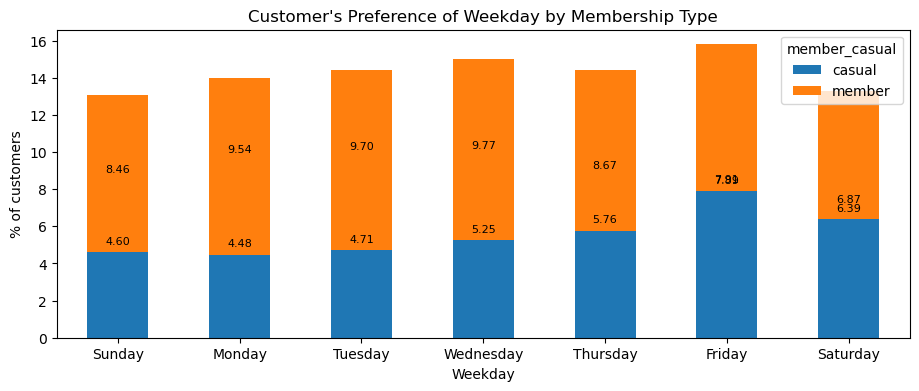

In [43]:
func = lambda x: (x.count()/df.shape[0])*100
table = pd.pivot_table(df[['ride_id','weekday','member_casual']],values='ride_id',
                       columns=['member_casual'],index=['weekday'],aggfunc=func).reset_index()
table.sort_values(by='weekday')
table['weekday'] = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plots = table.plot(x='weekday',kind='bar',stacked=True,title="Customer's Preference of Weekday by Membership Type",
                  figsize=(11,4))
annotations(plots)
plt.xlabel('Weekday')
plt.ylabel('% of customers')
plt.xticks(rotation='horizontal')
plt.show()

Since the distribution of number of customers among annual members and casual riders is almost equal. Still, friday the day when maximum customers of both category arrive equally. From the point of Casual riders, they mostly prefered Friday and Saturday among all other days as per the data.<br><br>
Moving forward

3. compare the rideable types by member vs casual riders

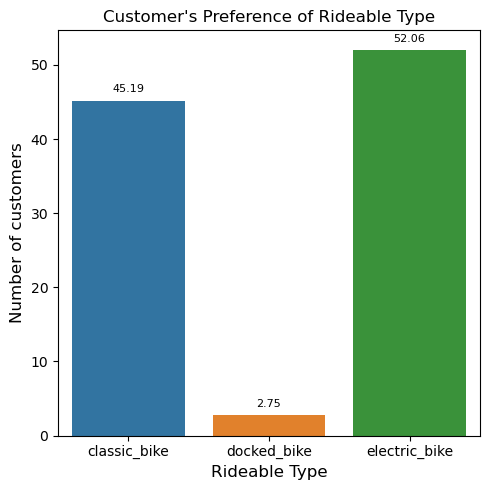

In [22]:
#rideable_type by member vs casual riders
plt.figure(figsize=(5,5))
table = df[['ride_id','rideable_type']].groupby(['rideable_type']).count().reset_index()
table['ride_id'] = (table['ride_id']/df.shape[0])*100
plots = sns.barplot(data= table,x='rideable_type',y = 'ride_id')
annotations(plots)
plt.title("Customer's Preference of Rideable Type",size=12)
plt.xlabel('Rideable Type',size=12)
plt.ylabel('Number of customers',size=12)
plt.xticks(rotation='horizontal')
plt.tight_layout()
plt.show()

<Figure size 500x500 with 0 Axes>

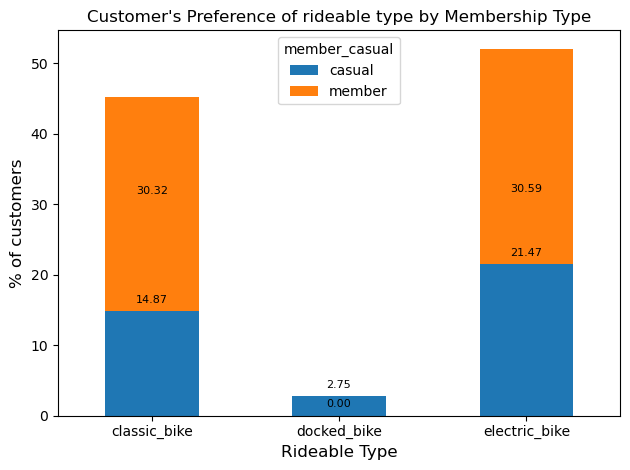

In [37]:
plt.figure(figsize=(5,5))
func = lambda x: (x.count()/df.shape[0])*100
table = pd.pivot_table(df[['ride_id','rideable_type','member_casual']],values='ride_id',
                       columns=['member_casual'],index=['rideable_type'],aggfunc=func).reset_index()

plots = table.plot(x='rideable_type',kind='bar',stacked=True,
                     title="Customer's Preference of rideable type by Membership Type")

annotations(plots)
plt.xlabel('Rideable Type',size=12)
plt.ylabel('% of customers',size=12)
plt.xticks(rotation='horizontal')
plt.tight_layout()
plt.show()

Docked bikes are less popular among customers than other types, since it has got the least number of customers' responses. On the other hand, Electric bikes seem to be prefered by both, members as well as casual riders but more popular among casual riders than classic bikes. although members like classic and electric bike almost equally.<br><br>
4. Start Stations and end stations of member vs casual riders

In [24]:
import pandas as pd
from shapely.geometry import Point
from geopandas import GeoDataFrame

geo = pd.pivot_table(df[(df['start_lat']!=45.63503432)&(df['start_lng']!=-73.79647696)],index = ['start_lat','start_lng',
                            'end_lat','end_lng','start_station_name','end_station_name','member_casual'],
                     values = 'ride_id',aggfunc='count').reset_index()

print("Total Number of Starting Stations: ",
      geo[['start_lat','start_lng']].shape[0]-geo[['start_lat','start_lng']].duplicated().sum())
print("Total Number of Ending Stations: ",
      geo[['end_lat','end_lng']].shape[0]-geo[['end_lat','end_lng']].duplicated().sum())


Total Number of Starting Stations:  2249844
Total Number of Ending Stations:  10779


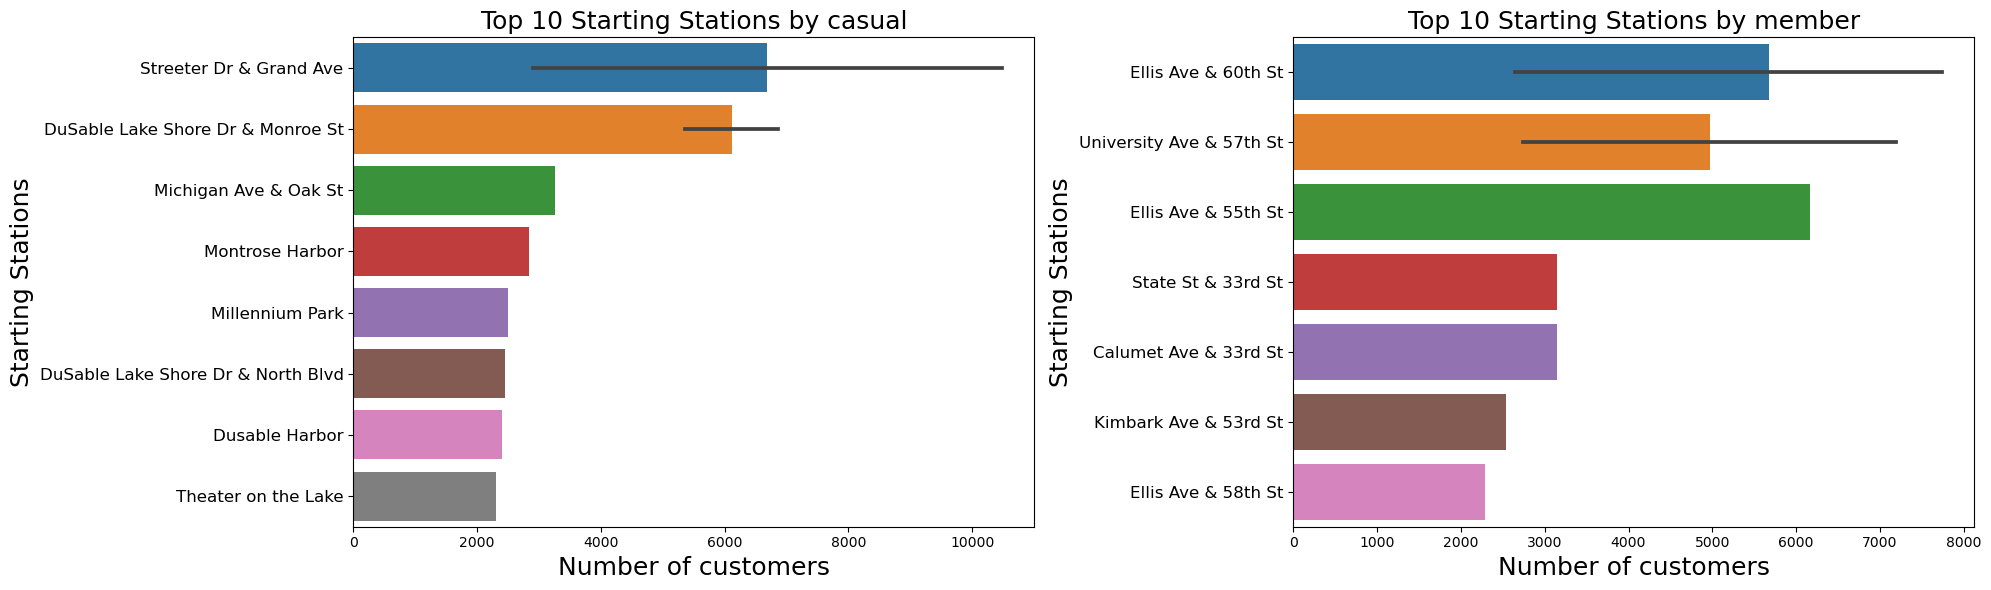

In [25]:
#rideable_type by member vs casual riders
fig,ax=plt.subplots(ncols = 2,figsize=(20,6))
m=0
for i in geo['member_casual'].unique():
    
    table = geo[geo['member_casual']==i].sort_values(by='ride_id',ascending=False).iloc[:10]
    sns.barplot(data= table,y='start_station_name',x = 'ride_id',ax=ax[m])

    ax[m].set_title(f"Top 10 Starting Stations by {i}",size=18)
    ax[m].set_ylabel('Starting Stations',size=18)
    ax[m].set_xlabel('Number of customers',size=18)
    ax[m].tick_params(axis="y", labelsize=12) 
    m+=1
    plt.tight_layout()

In [26]:
val= []
for i,j in geo[['start_lat','start_lng']].values:
    if i>41.85003 and j>-87.65005:
        val.append("North East")
    elif i<41.85003 and j<-87.65005:
        val.append("South West")
    elif i<41.85003 and j>-87.65005:
        val.append("South East")
    elif i>41.85003 and j<-87.65005:
        val.append("North West")
geo = geo.iloc[:-4,:]
geo['region']=val
#to plot map create a geometry column 
# geometry = [Point(xy) for xy in zip(geo['start_lng'], geo['start_lat'])]
# gdf = GeoDataFrame(geo, geometry=geometry)

# gdf.set_crs(epsg=4326, inplace=True)

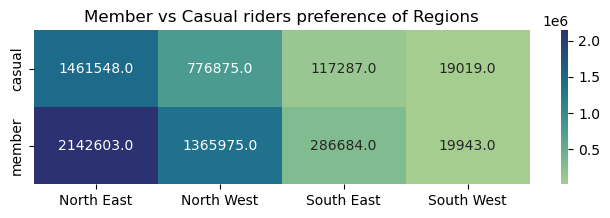

In [27]:
data = pd.pivot_table(geo,index='region',columns = 'member_casual',values ='ride_id',aggfunc = sum)
plt.figure(figsize=(8,2))
sns.heatmap(data.T,annot=True,fmt=".1f",cmap='crest')
plt.title("Member vs Casual riders preference of Regions")
plt.xlabel("")
plt.ylabel("")
plt.show()

Top 10 starting stations by Member and Casual riders are shown in the bar charts. Furthermore, the data is divided into four regions, among them North east region has the most popular starting stations in terms of number of customers of member as well as casual.

Moving Forward to the next analysis question

5. What is the distribution of rides by time of day for members vs casual riders? Are there any differences in usage patterns between the two groups?

In [28]:
#according to English Times, our dataset started_at time can be divided among the following times
import datetime
val = []
for i in df['started_at'].dt.time:
    if i>=datetime.time(4,0,0) and i<datetime.time(12,0,0):
        if i>datetime.time(4,0,0) and i<datetime.time(8,0,0):
            val.append("Early Morning (4am to 8am)")
        elif i>datetime.time(11,0,0) and i<datetime.time(12,0,0):
            val.append("Late Morning (11am to 12pm)")
        else:
            val.append("Morning (8am to 11am)")
    elif i>=datetime.time(12,0,0) and i<datetime.time(17,0,0):
        if i>=datetime.time(12,0,0) and i<datetime.time(15,0,0):
            val.append("Early Afternoon (12pm to 3pm)")
        elif i>=datetime.time(15,0,0) and i<datetime.time(17,0,0):
            val.append("Late Afternoon (3pm to 5pm)")
    elif i>=datetime.time(17,0,0) and i<datetime.time(21,0,0):
        if i>=datetime.time(17,0,0) and i<datetime.time(19,0,0):
            val.append("Early Evening (5pm to 7pm)")
        else:
            val.append("Evening (7pm to 9pm)")
    elif i>=datetime.time(21,0,0) or i<datetime.time(4,0,0):
        val.append("Night (9pm to 4am)")
df['Time of day']=val
func = lambda x: np.round((x.count()/df.shape[0])*100,2)
data = pd.pivot_table(df,index='Time of day',columns = 'member_casual',values ='ride_id',aggfunc = func).reset_index()
data

member_casual,Time of day,casual,member
0,Early Afternoon (12pm to 3pm),7.69,10.11
1,Early Evening (5pm to 7pm),7.09,11.58
2,Early Morning (4am to 8am),1.75,5.64
3,Evening (7pm to 9pm),4.36,6.29
4,Late Afternoon (3pm to 5pm),6.44,9.47
5,Late Morning (11am to 12pm),2.04,2.94
6,Morning (8am to 11am),4.02,9.00
7,Night (9pm to 4am),5.69,5.88


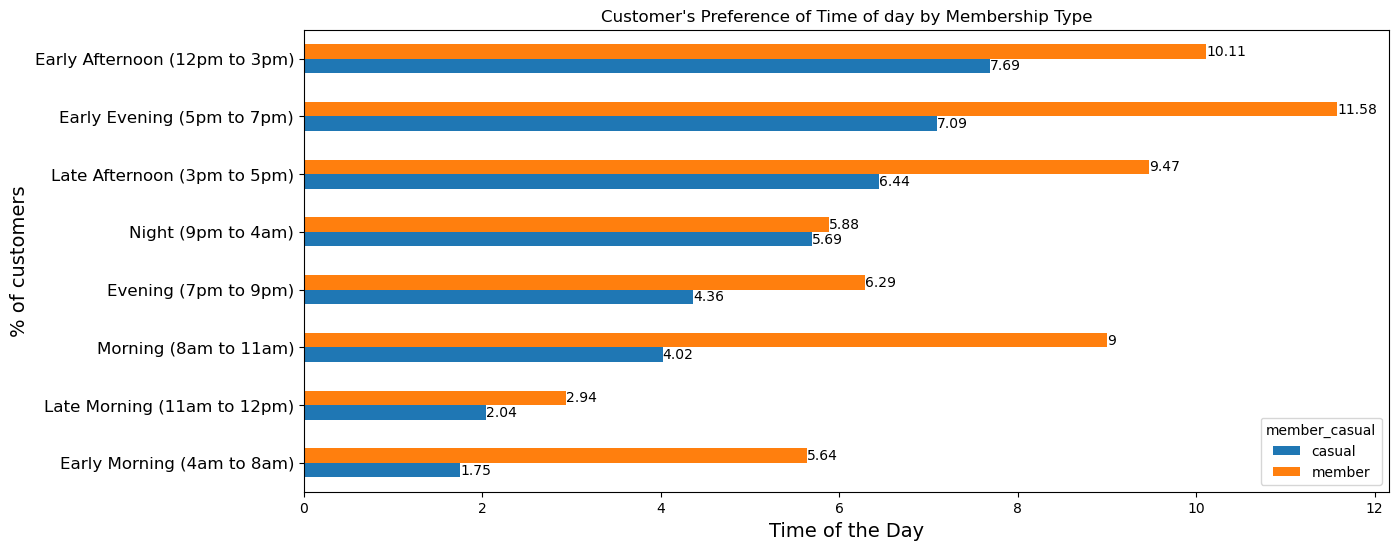

In [38]:
plots = data.sort_values(by='casual',ascending=True).plot(x='Time of day',kind='barh',stacked=False,
                                title="Customer's Preference of Time of day by Membership Type",figsize=(14,6))

for container in plots.containers:
    plots.bar_label(container)
plt.xlabel('Time of the Day',size=14)
plt.ylabel('% of customers',size=14)
plt.yticks(fontsize=12)
plt.show()

Early Afternoon and Early evening are the peak time for casual riders.
<br><br>
6. Further ahead, Let's see through the pattern of casual vs members with respect to months and years.

In [30]:
#Extracting year and months from the ride starting date.
df['year'] = df['started_at'].dt.year
df['month'] = df['started_at'].dt.month

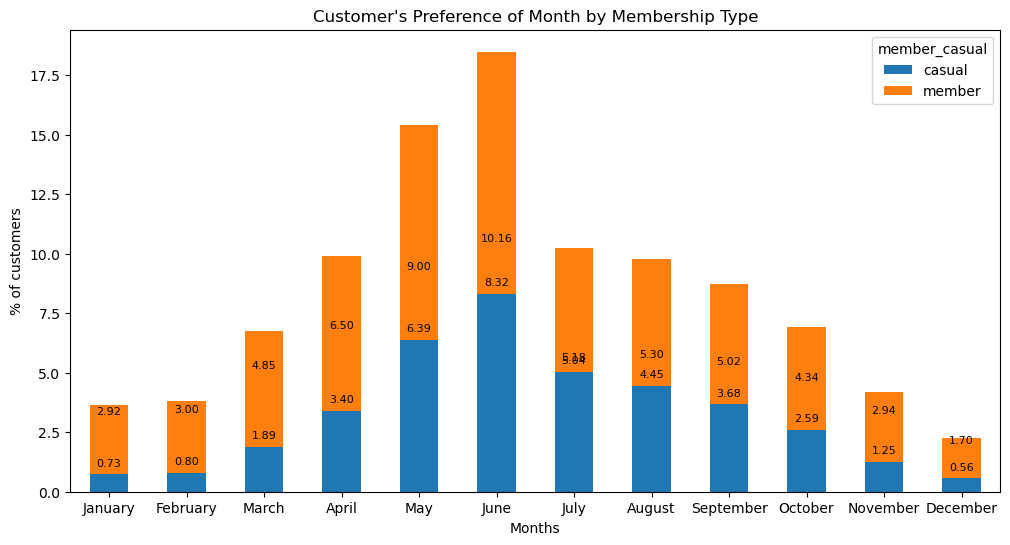

In [31]:
months = {1:'January',2:'February',3:'March',  4:'April',  5:'May',  6:'June',  7:'July',  8:'August',
          9:'September', 10:'October', 11:'November', 12:'December'}
func = lambda x: (x.count()/df.shape[0])*100
table = pd.pivot_table(df[['ride_id','month','member_casual']],values='ride_id',
                       columns=['member_casual'],index=['month'],aggfunc=func).reset_index()

table = table.sort_values(by='month')
table['month'] = ['January','February','March','April','May','June', 'July', 'August',
        'September','October', 'November','December']
plots = table.plot(x='month',kind='bar',stacked=True,title="Customer's Preference of Month by Membership Type",
                  figsize=(12,6))

annotations(plots)
plt.xlabel('Months')
plt.ylabel('% of customers')
plt.xticks(rotation='horizontal')
plt.show()

In [32]:
df['Mon_Year'] = df['started_at'].dt.strftime('%b-%Y')
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,weekday,Time of day,year,month,Mon_Year
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,00:02:57,3,Late Morning (11am to 12pm),2022,1,Jan-2022
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,00:04:21,0,Morning (8am to 11am),2022,1,Jan-2022
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,00:04:21,1,Early Morning (4am to 8am),2022,1,Jan-2022
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,00:14:56,1,Night (9pm to 4am),2022,1,Jan-2022
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,00:06:02,3,Night (9pm to 4am),2022,1,Jan-2022


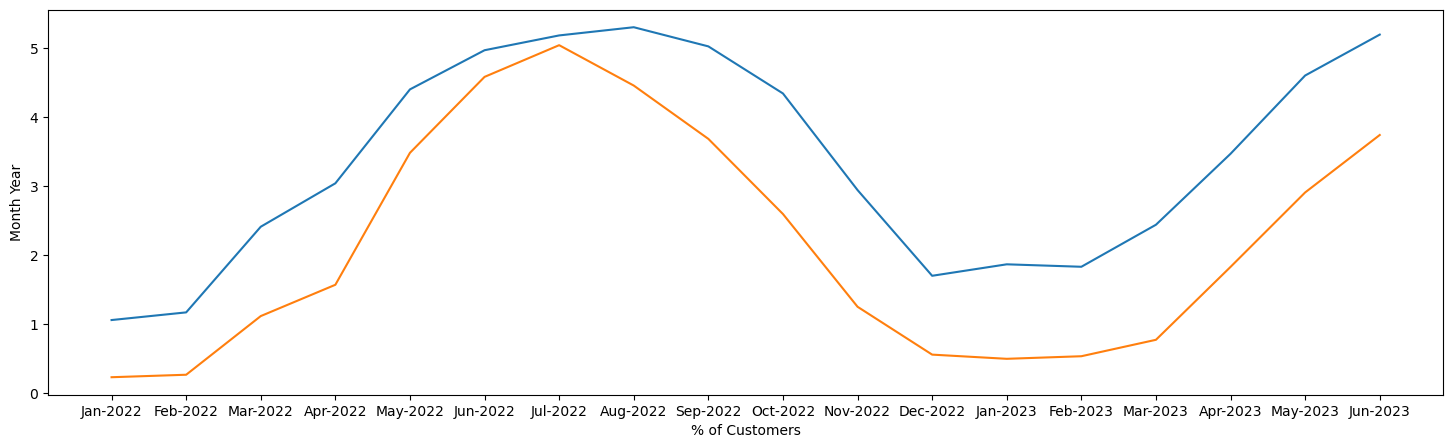

In [33]:
func = lambda x: (x.count()/df.shape[0])*100
table = pd.pivot_table(df[['ride_id','Mon_Year','member_casual']],values='ride_id',
                       columns=['member_casual'],index=['Mon_Year'],aggfunc=func).reset_index()
table['Mon_Year'] = pd.to_datetime(table['Mon_Year'])
table = table.sort_values(by='Mon_Year')
table['Mon_Year'] = table['Mon_Year'].dt.strftime('%b-%Y')
plt.figure(figsize=(18,5))
sns.lineplot(data =table,x='Mon_Year',y ='member')
sns.lineplot(data =table,x='Mon_Year',y ='casual')
plt.xlabel("% of Customers")
plt.ylabel("Month Year")
plt.show()

Since the maximum riders were observed in the month of June and from the above plot, a cyclic trend is getting created which is resulting the maximum sales in Jun 2023 as well till now.

###### let's discuss all these in terms of ride lengths

<Figure size 500x500 with 0 Axes>

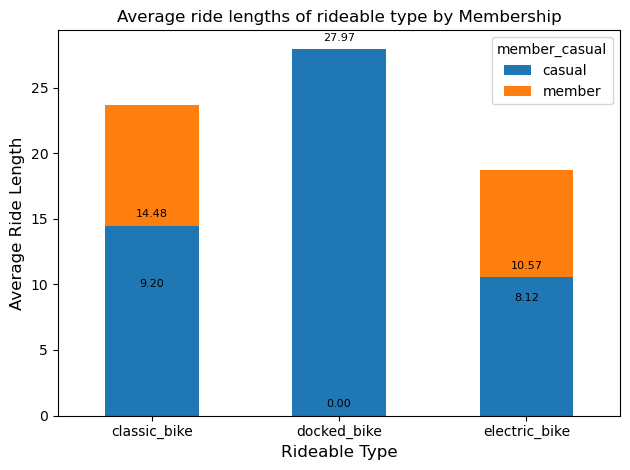

In [44]:
from statistics import median
ride_lengths['rideable_type'] = df['rideable_type']
plt.figure(figsize=(5,5))
func = lambda x: median(x)/60
table = pd.pivot_table(ride_lengths[['ride_length','rideable_type','member_casual']],values='ride_length',
                       columns=['member_casual'],index=['rideable_type'],aggfunc=func).reset_index()

plots = table.plot(x='rideable_type',kind='bar',stacked=True,
                     title="Average ride lengths of rideable type by Membership")

annotations(plots)
plt.xlabel('Rideable Type',size=12)
plt.ylabel('Average Ride Length',size=12)
plt.xticks(rotation='horizontal')
plt.tight_layout()
plt.show()

Docked bike is mostly preferred for longer duration rides by the customers

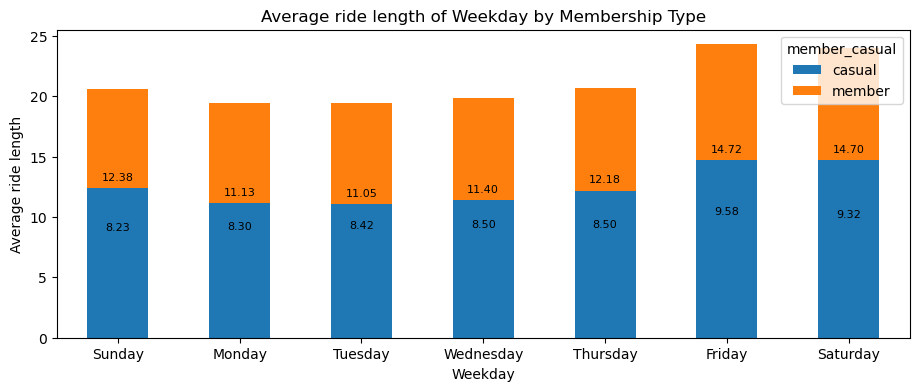

In [45]:
from statistics import median
ride_lengths['weekday'] = df['weekday']
func = lambda x: median(x)/60
table = pd.pivot_table(ride_lengths[['ride_length','weekday','member_casual']],values='ride_length',
                       columns=['member_casual'],index=['weekday'],aggfunc=func).reset_index()
table.sort_values(by='weekday')
table['weekday'] = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plots = table.plot(x='weekday',kind='bar',stacked=True,title="Average ride length of Weekday by Membership Type",
                  figsize=(11,4))
annotations(plots)
plt.xlabel('Weekday')
plt.ylabel('Average ride length')
plt.xticks(rotation='horizontal')
plt.show()

Friday and Saturday are the weekdays when customers prefer to ride longer than other weekdays.